In [1]:
# !pip install -U openmim //jupyter里不能运行可以去conda命令行执行
#!mim install mmcv-full   //去conda里也可以执行
# !git clone https://github.com/open-mmlab/mmsegmentation.git //git克隆不了直接github下载
# cd mmsegmentation //jupyter里直接可以运行，一次就进入了这个文件夹，是否成功可以%ls查看

In [2]:
%ls

 驱动器 E 中的卷没有标签。
 卷的序列号是 FE64-DABC

 E:\12DEMO\1-Techart 的目录

2023/03/29  17:25    <DIR>          .
2023/02/03  22:11    <DIR>          ..
2023/03/12  15:50    <DIR>          .ipynb_checkpoints
2023/01/15  23:35             2,457 0-document&test.ipynb
2023/04/24  22:21    <DIR>          0pic_input
2023/02/17  18:40    <DIR>          0pic_output-ade20k
2023/02/16  15:35    <DIR>          0pic_output-cityscapes
2023/04/24  22:12    <DIR>          1-analysis
2023/03/29  17:24    <DIR>          1pic_input
2023/02/17  17:45    <DIR>          1pic_output
2023/02/17  17:53         4,279,762 1-segtest-ADE20K单张.ipynb
2023/02/17  18:41         4,180,643 1-segtest-ade20k批处理.ipynb
2023/03/29  17:25           314,355 1-segtesT-cityscapest.ipynb
2023/02/17  17:52               747 knet_s3_upernet_swin-l_8x2_512x512_adamw_80k_ade20k.py
2022/03/07  18:39       988,665,851 knet_s3_upernet_swin-l_8x2_512x512_adamw_80k_ade20k_20220303_154559-d8da9a90.pth
2023/02/17  18:08             9,725 knet_s3_upernet

In [3]:
cd mmsegmentation #找不到则说明已进入

[WinError 2] 系统找不到指定的文件。: 'mmsegmentation #找不到则说明已进入'
E:\12DEMO\1-Techart


In [4]:
#mmlab批处理库
from mmseg.apis import inference_segmentor, init_segmentor

D:\Anaconda\envs\openmmlab\lib\site-packages\mmcv\__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [5]:
import mmcv
import os

In [6]:
#1 获取模型
!wget https://raw.githubusercontent.com/open-mmlab/mmsegmentation/master/configs/segformer/segformer_mit-b2_8x1_1024x1024_160k_cityscapes.py
!wget https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b2_8x1_1024x1024_160k_cityscapes/segformer_mit-b2_8x1_1024x1024_160k_cityscapes_20211207_134205-6096669a.pth

--2023-04-24 22:22:40--  https://raw.githubusercontent.com/open-mmlab/mmsegmentation/master/configs/segformer/segformer_mit-b2_8x1_1024x1024_160k_cityscapes.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 398 [text/plain]
Saving to: 'segformer_mit-b2_8x1_1024x1024_160k_cityscapes.py.2'

     0K                                                       100% 28.8M=0s

2023-04-24 22:22:41 (28.8 MB/s) - 'segformer_mit-b2_8x1_1024x1024_160k_cityscapes.py.2' saved [398/398]

--2023-04-24 22:22:41--  https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b2_8x1_1024x1024_160k_cityscapes/segformer_mit-b2_8x1_1024x1024_160k_cityscapes_20211207_134205-6096669a.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 60.6.3.10

In [7]:
%ls 

 驱动器 E 中的卷没有标签。
 卷的序列号是 FE64-DABC

 E:\12DEMO\1-Techart 的目录

2023/04/24  22:22    <DIR>          .
2023/02/03  22:11    <DIR>          ..
2023/03/12  15:50    <DIR>          .ipynb_checkpoints
2023/01/15  23:35             2,457 0-document&test.ipynb
2023/04/24  22:21    <DIR>          0pic_input
2023/02/17  18:40    <DIR>          0pic_output-ade20k
2023/02/16  15:35    <DIR>          0pic_output-cityscapes
2023/04/24  22:12    <DIR>          1-analysis
2023/03/29  17:24    <DIR>          1pic_input
2023/02/17  17:45    <DIR>          1pic_output
2023/02/17  17:53         4,279,762 1-segtest-ADE20K单张.ipynb
2023/02/17  18:41         4,180,643 1-segtest-ade20k批处理.ipynb
2023/03/29  17:25           314,355 1-segtesT-cityscapest.ipynb
2023/02/17  17:52               747 knet_s3_upernet_swin-l_8x2_512x512_adamw_80k_ade20k.py
2022/03/07  18:39       988,665,851 knet_s3_upernet_swin-l_8x2_512x512_adamw_80k_ade20k_20220303_154559-d8da9a90.pth
2023/02/17  18:08             9,725 knet_s3_upernet

In [8]:
#2 初始化模型
!mim download mmsegmentation --config segformer_mit-b2_8x1_1024x1024_160k_cityscapes --dest .

processing segformer_mit-b2_8x1_1024x1024_160k_cityscapes...
segformer_mit-b2_8x1_1024x1024_160k_cityscapes_20211207_134205-6096669a.pth exists in E:\12DEMO\1-Techart
Successfully dumped segformer_mit-b2_8x1_1024x1024_160k_cityscapes.py to E:\12DEMO\1-Techart


In [9]:
#批处理图片
config_file = 'segformer_mit-b2_8x1_1024x1024_160k_cityscapes.py'
checkpoint_file = 'segformer_mit-b2_8x1_1024x1024_160k_cityscapes_20211207_134205-6096669a.pth'
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

e:\12demo\1-techart\mmsegmentation\mmseg\models\losses\cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: segformer_mit-b2_8x1_1024x1024_160k_cityscapes_20211207_134205-6096669a.pth


In [10]:
# 批处理尝试2
input_path = "1pic_input"
output_path = "1pic_output"
filename_list = os.listdir(input_path)
for filename in filename_list:
  input_img_path = input_path + '/' + filename
  print(filename)
  result = inference_segmentor(model, input_img_path)
  #output_img_path = output_path + '/' + filename
  #model.show_result(input_img_path, result, out_file=output_img_path, opacity=0.5)

1.jpg
2.jpg
3.png


In [11]:
from mmseg.core.evaluation import get_classes, get_palette
classes1 = get_classes('cityscapes')
palette1 = get_palette('cityscapes')
print(classes1,palette1)

['road', 'sidewalk', 'building', 'wall', 'fence', 'pole', 'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle', 'bicycle'] [[128, 64, 128], [244, 35, 232], [70, 70, 70], [102, 102, 156], [190, 153, 153], [153, 153, 153], [250, 170, 30], [220, 220, 0], [107, 142, 35], [152, 251, 152], [70, 130, 180], [220, 20, 60], [255, 0, 0], [0, 0, 142], [0, 0, 70], [0, 60, 100], [0, 80, 100], [0, 0, 230], [119, 11, 32]]


In [12]:
from mmseg.apis import show_result_pyplot

In [13]:
test_result = inference_segmentor(model, '1pic_input/3.png')

In [14]:
img = mmcv.imread('1pic_input/3.png')

e:\12demo\1-techart\mmsegmentation\mmseg\models\segmentors\base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


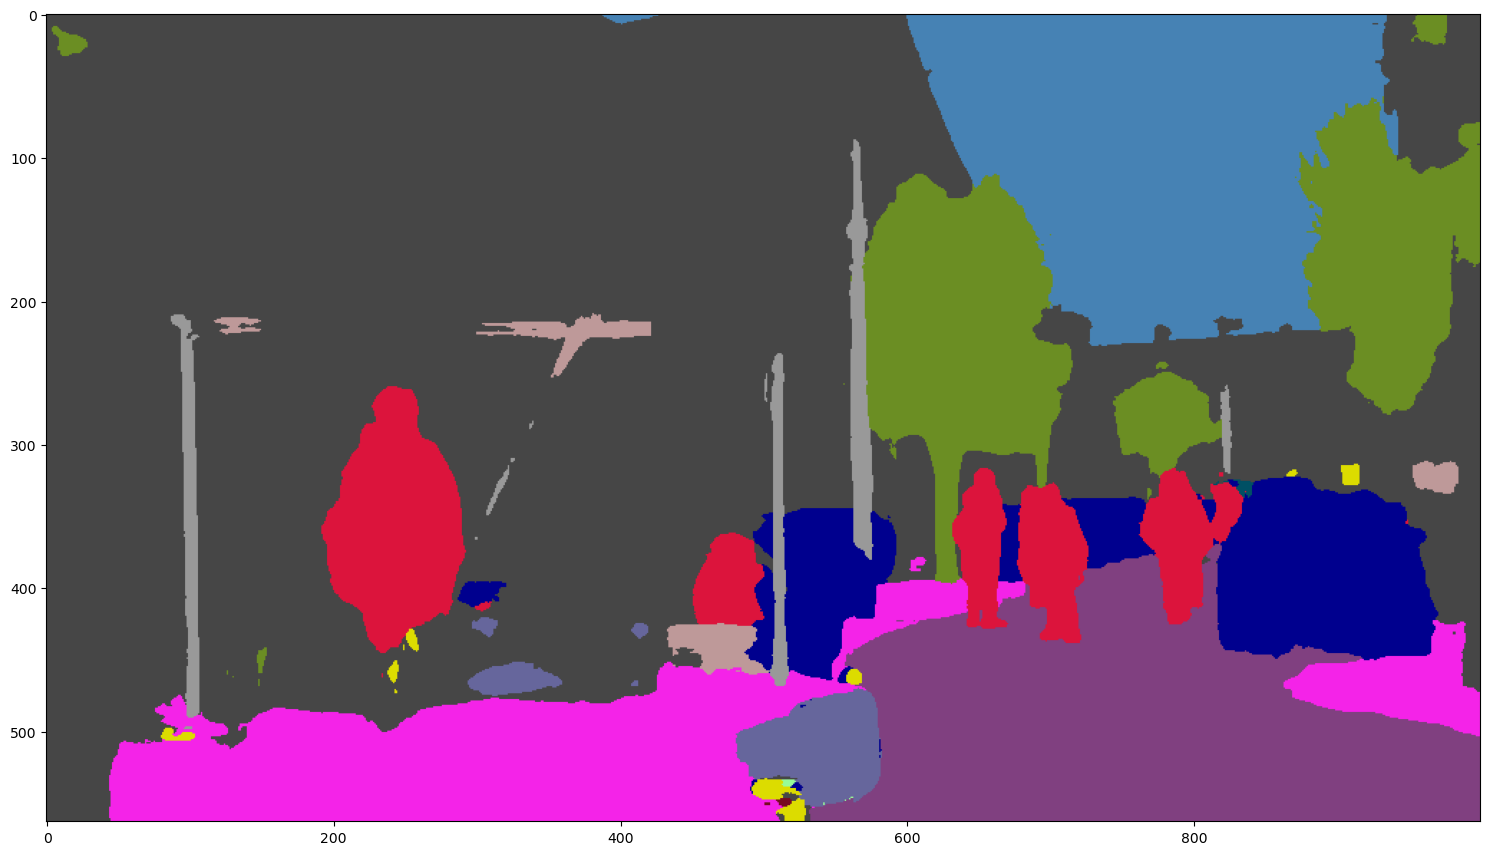

In [15]:
show_result_pyplot(model, img, test_result, palette1,opacity=1)

In [19]:
print(len(test_result[0][0])) 

1000


In [20]:
res = test_result[0]
print(len(res))

563


In [21]:
set_res = set()
for i in range(100):
    for j in range(1920):
        set_res.add(res[i][j])
print(set_res)

IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [22]:
print(res[0][1100])

IndexError: index 1100 is out of bounds for axis 0 with size 1000

In [23]:
dic_res = {}
for i in range(19):
    dic_res[i]= 0
for i in range(1080):
    for j in range(1920): 
        dic_res[res[i][j]] = dic_res[res[i][j]]+1
print(dic_res)

IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [24]:
percent_res = []
sum = 1920*1080
for i in range(19):
    percent_res.append(dic_res[i]/sum)
print(percent_res)

[0.0, 0.0, 0.00029031635802469137, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0127314814814815e-05, 0.0, 0.0001818094135802469, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## 正式流程

In [25]:
import pandas as pd 
import requests
import openpyxl

In [26]:
total_list =[]
total_list.append(percent_res)
df = pd.DataFrame(total_list)
file = r'./all_cityscape.xlsx'
df.to_excel(file)

In [27]:
input_path = "2pic_input"
output_path = "2pic_output-cityscapes"
filename_list = os.listdir(input_path)

pixel_sum = 1920*1080
dic_res = {}
total_list =[]

for filename in filename_list:
    input_img_path = input_path + '/' + filename
    print(filename)
    result = inference_segmentor(model, input_img_path)
    output_img_path = output_path + '/' + filename
    model.show_result(input_img_path, result, out_file=output_img_path, opacity=0.5)
    
    res = result[0]
    
 #  set_res.clear()
 
 # ctrl + F 注释多行
 #     for i in range(1080):
 #         for j in range(1920):
 #             set_res.add(res[i][j])
 #     print(set_res)
    
    dic_res.clear()
    for i in range(19):
        dic_res[i]= 0
    for i in range(1080):
        for j in range(1920): 
            dic_res[res[i][j]] = dic_res[res[i][j]]+1
    #print(dic_res)
    
    percent_res = []
    percent_res.append(filename)
    
    for i in range(19):
        percent_res.append(dic_res[i]/pixel_sum)
    #print(percent_res)

  
    total_list.append(percent_res)
    df = pd.DataFrame(total_list)
    df.columns = ['pic_name','road', 'sidewalk', 'building', 'wall', 'fence', 'pole', 'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle', 'bicycle']
    file = r'./all-cityscapes.xlsx'
    df.to_excel(file)

A_001.jpg
A_002.jpg
A_003.jpg
A_004.jpg
A_005.jpg
A_006.jpg
A_007.jpg
A_008.jpg
A_009.jpg
A_010.jpg
A_011.jpg
A_012.jpg
A_013.jpg
A_014.jpg
A_015.jpg
A_016.jpg
A_017.jpg
A_018.jpg
A_019.jpg
A_020.jpg
A_021.jpg
A_022.jpg
A_023.jpg
A_024.jpg
A_025.jpg
A_026.jpg
A_027.jpg
A_028.jpg
A_029.jpg
A_030.jpg
A_031.jpg
A_032.jpg
A_033.jpg
B_001.jpg
B_002.jpg
B_003.jpg
B_004.jpg
B_005.jpg
B_006.jpg
B_007.jpg
B_008.jpg
B_009.jpg
B_010.jpg
B_011.jpg
B_012.jpg
B_013.jpg
B_014.jpg
B_015.jpg
B_016.jpg
B_017.jpg
B_018.jpg
B_019.jpg
B_020.jpg
B_021.jpg
B_022.jpg
B_023.jpg
B_024.jpg
B_025.jpg
B_026.jpg
B_027.jpg
B_028.jpg
B_029.jpg
B_030.jpg
B_031.jpg
B_032.jpg
B_033.jpg
B_034.jpg
B_035.jpg
B_036.jpg
B_037.jpg
B_038.jpg
B_039.jpg
C-E_001.jpg
C-E_002.jpg
C-E_003.jpg
C-E_004.jpg
C-E_005.jpg
C-E_006.jpg
C-E_007.jpg
C-E_008.jpg
C-E_009.jpg
C-E_010.jpg
C-E_011.jpg
C-E_012.jpg
C-E_013.jpg
C-E_014.jpg
C-E_015.jpg
C-E_016.jpg
C-E_017.jpg
C-E_018.jpg
C-E_019.jpg
C-E_020.jpg
C-E_021.jpg
C-E_022.jpg
C-E_023.jpg
C-E_

In [28]:
data = pd.read_excel(file)
data.head() # 显示前几行，默认前五行

FileNotFoundError: [Errno 2] No such file or directory: './res.xlsx'